#DA R3 : BigMart Sales Analysis

---


Problem Statement: For data comprising of transaction records of a sales store.
The data has 8523 rows of 12 variables. Predict the sales of a store. 

##Dataset Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. 

*   Item_Identifier: Unique product ID

*   Item_Weight: Weight of product

*   Item_Fat_Content: Whether the product is low fat or not

*   Item_Visibility: The % of total display area of all products in a store allocated to the particular product

*   Item_Type: The category to which the product belongs

*   Item_MRP: Maximum Retail Price (list price) of the product

*   Outlet_Identifier: Unique store ID

*   Outlet_Establishment_Year: The year in which store was established

*   Outlet_Size: The size of the store in terms of ground area covered

*   Outlet_Location_Type: The type of city in which the store is located

*   Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

*   Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.

##Programmer's Perspective


Let S be the system set:

>S = {s; e;X; Y; Fme;DD;NDD; Fc; Sc}
*   where Dataset is loaded into the dataframe

---

s=start state 

e=end state
*   predicted sales

X=set of inputs
X = {X1}
*   where X1 =  BigMart Sales Dataset (8523 records, 12 columns)

Y=set of outputs
  Y = {Y1, Y2}
*   Y1 = Predicted Values
*   Y2 = Accuracy Score (Metric - RMSE)

Fme is the set of main functions
*   Fe = {f0}
  1. f0 = Main Display Function
  
Ff is the set of friend functions
*   Ff = {f1,f2,f3,f4,f5,f6} where
  1. f1 = function to load dataset into dataframe
  2. f2 = function to handle null values
  3. f3 = function to handle redundant values
  4. f4 = function to generate label encoding of string values
  5. f5 = function to split dataset into test and train data
  6. f6 = function to train the model
    
DD = Deterministic Data
*   BigMart Sales Dataset

NDD = Non-deterministic data (Eg - Null Values in Dataset)
*   1463 null values in the the feature Item_Weight 
*   2410 null values in the the feature Outlet_Size 

Fc = failure case
*   High Value of RMSE
*   Low Value of R2




##Flowchart

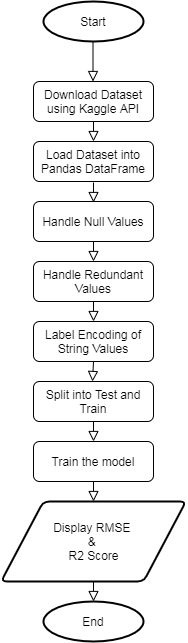

##Main Assignment

###Downloading Dataset using Kaggle CLI

In [ ]:
#Installing Kaggle and Kaggle CLI Python Libraries
!pip install -q kaggle
!pip install -q kaggle-cli

#Use Apoorv's Kaggle Account's API token to download Kaggle Dataset to Colab
#We store this API token in "kaggle.json"
f = open("kaggle.json","w+")
f.write('{"username":"apoorvdixit99","key":"07ea0b3ad4b87e5e87c0f1dcd3f10e86"}')
f.close()

#IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle
#The -p will create the directory (along with the directories that lead to the directory you want to create)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Warning: Your Kaggle API key is readable by other users on this system! To fix this, you can run 'chmod 600 /root/.kaggle/kaggle.json'
#Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that,
#(U)ser / owner can read, can write and can't execute.
#(G)roup can't read, can't write and can't execute.
#(O)thers can't read, can't write and can't execute.
!chmod 600 ~/.kaggle/kaggle.json

#Download the dataset
!kaggle datasets download -d brijbhushannanda1979/bigmart-sales-data

#Unzip the dataset
!unzip \bigmart-sales-data.zip

#Remove Unnecessary Files
!rm -rf kaggle.json
!rm -r sample_data
!rm -r bigmart-sales-data.zip
!rm -r Test.csv

     |████████████████████████████████| 81kB 2.3MB/s 
     |████████████████████████████████| 5.3MB 4.7MB/s 
     |████████████████████████████████| 133kB 29.6MB/s 
     |████████████████████████████████| 112kB 25.6MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
  0% 0.00/307k [00:00<?, ?B/s]
100% 307k/307k [00:00<00:00, 44.0MB/s]
Archive:  bigmart-sales-data.zip
  inflating: Test.csv                
  inflating: Train.csv               


###Loading the dataset into pandas dataframe

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###Handling Null Values

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
print("Mean : ",df['Item_Weight'].mean())
print("Median : ",df['Item_Weight'].median())
print("Mode : ",df['Item_Weight'].mode()[0])
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

print("Mode : ",df['Outlet_Size'].mode()[0])
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

Mean :  12.857645184136183
Median :  12.6
Mode :  12.15
Mode :  Medium


###Handling Redundant Values

In [ ]:
print("Unique Values in Item_Fat_Content before modification - ",df['Item_Fat_Content'].unique())

Unique Values in Item_Fat_Content before modification -  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [ ]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
df['Item_Fat_Content'].replace(to_replace='low fat', value='Low Fat', inplace=True)
df['Item_Fat_Content'].replace(to_replace='LF', value='Low Fat', inplace=True)
df['Item_Fat_Content'].replace(to_replace='reg', value='Regular', inplace=True)

In [ ]:
print("Unique Values in Item_Fat_Content after modification - ",df['Item_Fat_Content'].unique())

Unique Values in Item_Fat_Content after modification -  ['Low Fat' 'Regular']


###Label Encoding of String Values

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_encoder = LabelEncoder()
df['Item_Identifier'] = lb_encoder.fit_transform(df['Item_Identifier'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

lb_encoder = LabelEncoder()
df['Item_Fat_Content'] = lb_encoder.fit_transform(df['Item_Fat_Content'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

lb_encoder = LabelEncoder()
df['Item_Type'] = lb_encoder.fit_transform(df['Item_Type'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

lb_encoder = LabelEncoder()
df['Outlet_Identifier'] = lb_encoder.fit_transform(df['Outlet_Identifier'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

lb_encoder = LabelEncoder()
df['Outlet_Location_Type'] = lb_encoder.fit_transform(df['Outlet_Location_Type'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

lb_encoder = LabelEncoder()
df['Outlet_Type'] = lb_encoder.fit_transform(df['Outlet_Type'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

lb_encoder = LabelEncoder()
df['Outlet_Size'] = lb_encoder.fit_transform(df['Outlet_Size'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

{'DRA12': 0, 'DRA24': 1, 'DRA59': 2, 'DRB01': 3, 'DRB13': 4, 'DRB24': 5, 'DRB25': 6, 'DRB48': 7, 'DRC01': 8, 'DRC12': 9, 'DRC13': 10, 'DRC24': 11, 'DRC25': 12, 'DRC27': 13, 'DRC36': 14, 'DRC49': 15, 'DRD01': 16, 'DRD12': 17, 'DRD13': 18, 'DRD15': 19, 'DRD24': 20, 'DRD25': 21, 'DRD27': 22, 'DRD37': 23, 'DRD49': 24, 'DRD60': 25, 'DRE01': 26, 'DRE03': 27, 'DRE12': 28, 'DRE13': 29, 'DRE15': 30, 'DRE25': 31, 'DRE27': 32, 'DRE37': 33, 'DRE48': 34, 'DRE49': 35, 'DRE60': 36, 'DRF01': 37, 'DRF03': 38, 'DRF13': 39, 'DRF15': 40, 'DRF23': 41, 'DRF25': 42, 'DRF27': 43, 'DRF36': 44, 'DRF37': 45, 'DRF48': 46, 'DRF49': 47, 'DRF51': 48, 'DRF60': 49, 'DRG01': 50, 'DRG03': 51, 'DRG11': 52, 'DRG13': 53, 'DRG15': 54, 'DRG23': 55, 'DRG25': 56, 'DRG27': 57, 'DRG36': 58, 'DRG37': 59, 'DRG39': 60, 'DRG48': 61, 'DRG49': 62, 'DRG51': 63, 'DRH01': 64, 'DRH03': 65, 'DRH11': 66, 'DRH13': 67, 'DRH15': 68, 'DRH23': 69, 'DRH25': 70, 'DRH36': 71, 'DRH37': 72, 'DRH39': 73, 'DRH49': 74, 'DRH51': 75, 'DRH59': 76, 'DRI01':

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


###Splitting into Testing and Training

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

import math

X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Regression Algorithms - Higher Order Functions

In [ ]:
def RegressionAlgorithm(func, **kwargs):

  def innerFunction():
    model = func(**kwargs)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = math.sqrt(mean_squared_error(y_test, y_pred))

    print("Root Mean squared error: %.2f" % rmse)
    print('R2 score: %.2f' % r2_score(y_test, y_pred))

  return innerFunction

In [ ]:
from sklearn.linear_model import LinearRegression
RegressionAlgorithm(LinearRegression)()

Root Mean squared error: 1152.13
R2 score: 0.51


In [ ]:
from sklearn.linear_model import Ridge
RegressionAlgorithm(Ridge)()

Root Mean squared error: 1152.23
R2 score: 0.51


In [ ]:
from sklearn.linear_model import Lasso
RegressionAlgorithm(Lasso)()

Root Mean squared error: 1152.89
R2 score: 0.51


In [ ]:
from sklearn.linear_model import ElasticNet
RegressionAlgorithm(ElasticNet)()

Root Mean squared error: 1183.13
R2 score: 0.48


In [ ]:
from sklearn.ensemble import RandomForestRegressor 
RegressionAlgorithm(RandomForestRegressor,n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)()

Root Mean squared error: 1044.38
R2 score: 0.59


In [ ]:
from sklearn.svm import LinearSVR
RegressionAlgorithm(LinearSVR, max_iter=10000)()

Root Mean squared error: 1181.76
R2 score: 0.48


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.neural_network import MLPRegressor
RegressionAlgorithm(MLPRegressor,max_iter=500)()

Root Mean squared error: 1149.64
R2 score: 0.51


In [ ]:
from sklearn.tree import DecisionTreeRegressor
RegressionAlgorithm(DecisionTreeRegressor,max_depth=15,min_samples_leaf=300)()

Root Mean squared error: 1076.45
R2 score: 0.57


In [ ]:
!pip install graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz

model = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean squared error: %.2f" % rmse)
print('R2 score: %.2f' % r2_score(y_test, y_pred))

dot_data = export_graphviz(model, out_file=None,filled=True, rounded=True,special_characters=True)   
graph = graphviz.Source(dot_data) 
graph.render("bigmart_decision_tree") 

Root Mean squared error: 1144.83
R2 score: 0.56


'bigmart_decision_tree.pdf'

##Modification

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [ ]:
df = pd.read_csv('Train.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
df = pd.read_csv('Train.csv')

for i in range(4000):
  df = df.append({
      'Item_Identifier':'WAT01',
      'Item_Weight':df.Item_Weight.mean(),
      'Item_Fat_Content':'Low Fat',
      'Item_Visibility':df.Item_Visibility.mean(),
      'Item_Type':'Water',
      'Item_MRP':df.Item_MRP.mean(),
      'Outlet_Identifier':'OUT013',
      'Outlet_Establishment_Year':'2010',
      'Outlet_Size':'High',
      'Outlet_Location_Type':'Tier 3',
      'Outlet_Type':'Supermarket Type1',
      'Item_Outlet_Sales':732.3800
    },ignore_index=True)

In [ ]:
df.shape

(12523, 12)

In [ ]:
RegressionAlgorithm(DecisionTreeRegressor,max_depth=15,min_samples_leaf=300)()

Root Mean squared error: 1076.45
R2 score: 0.57


In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

df['Item_Fat_Content'].replace(to_replace='low fat', value='Low Fat', inplace=True)
df['Item_Fat_Content'].replace(to_replace='LF', value='Low Fat', inplace=True)
df['Item_Fat_Content'].replace(to_replace='reg', value='Regular', inplace=True)

lb_encoder = LabelEncoder()
df['Item_Identifier'] = lb_encoder.fit_transform(df['Item_Identifier'])

lb_encoder = LabelEncoder()
df['Item_Fat_Content'] = lb_encoder.fit_transform(df['Item_Fat_Content'])

lb_encoder = LabelEncoder()
df['Item_Type'] = lb_encoder.fit_transform(df['Item_Type'])

lb_encoder = LabelEncoder()
df['Outlet_Identifier'] = lb_encoder.fit_transform(df['Outlet_Identifier'])

lb_encoder = LabelEncoder()
df['Outlet_Location_Type'] = lb_encoder.fit_transform(df['Outlet_Location_Type'])

lb_encoder = LabelEncoder()
df['Outlet_Type'] = lb_encoder.fit_transform(df['Outlet_Type'])

lb_encoder = LabelEncoder()
df['Outlet_Size'] = lb_encoder.fit_transform(df['Outlet_Size'])

##PyCaret

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.regression import setup, compare_models
experiment = setup(df, target = 'Item_Outlet_Sales')

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,758.3862,1176788.6612,1083.8272,0.5970,0.5568,0.5622,0.6063
1,Gradient Boosting Regressor,758.5219,1179073.3417,1084.9573,0.5961,0.5663,0.5645,1.1598
2,CatBoost Regressor,787.7972,1261659.4898,1122.2421,0.5677,0.5905,0.5840,3.0076
3,Light Gradient Boosting Machine,783.8869,1271670.2613,1126.2989,0.5647,0.5623,0.5723,0.1312
4,Orthogonal Matching Pursuit,838.0810,1287015.3442,1133.3814,0.5598,0.7229,1.0500,0.0108
5,Lasso Regression,839.3370,1289719.4633,1134.5091,0.5590,0.7249,1.0514,0.0608
6,Bayesian Ridge,839.8183,1290773.0605,1134.9566,0.5586,0.7284,1.0491,0.0249
7,Ridge Regression,840.3434,1291197.2467,1135.1475,0.5585,0.7280,1.0544,0.0085
8,TheilSen Regressor,839.0231,1291101.0897,1135.0905,0.5585,0.7372,1.0338,7.5853
9,Linear Regression,840.4148,1291267.4332,1135.1787,0.5584,0.7294,1.0549,0.0165


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=8227,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

##IBM Watson - Screenshots

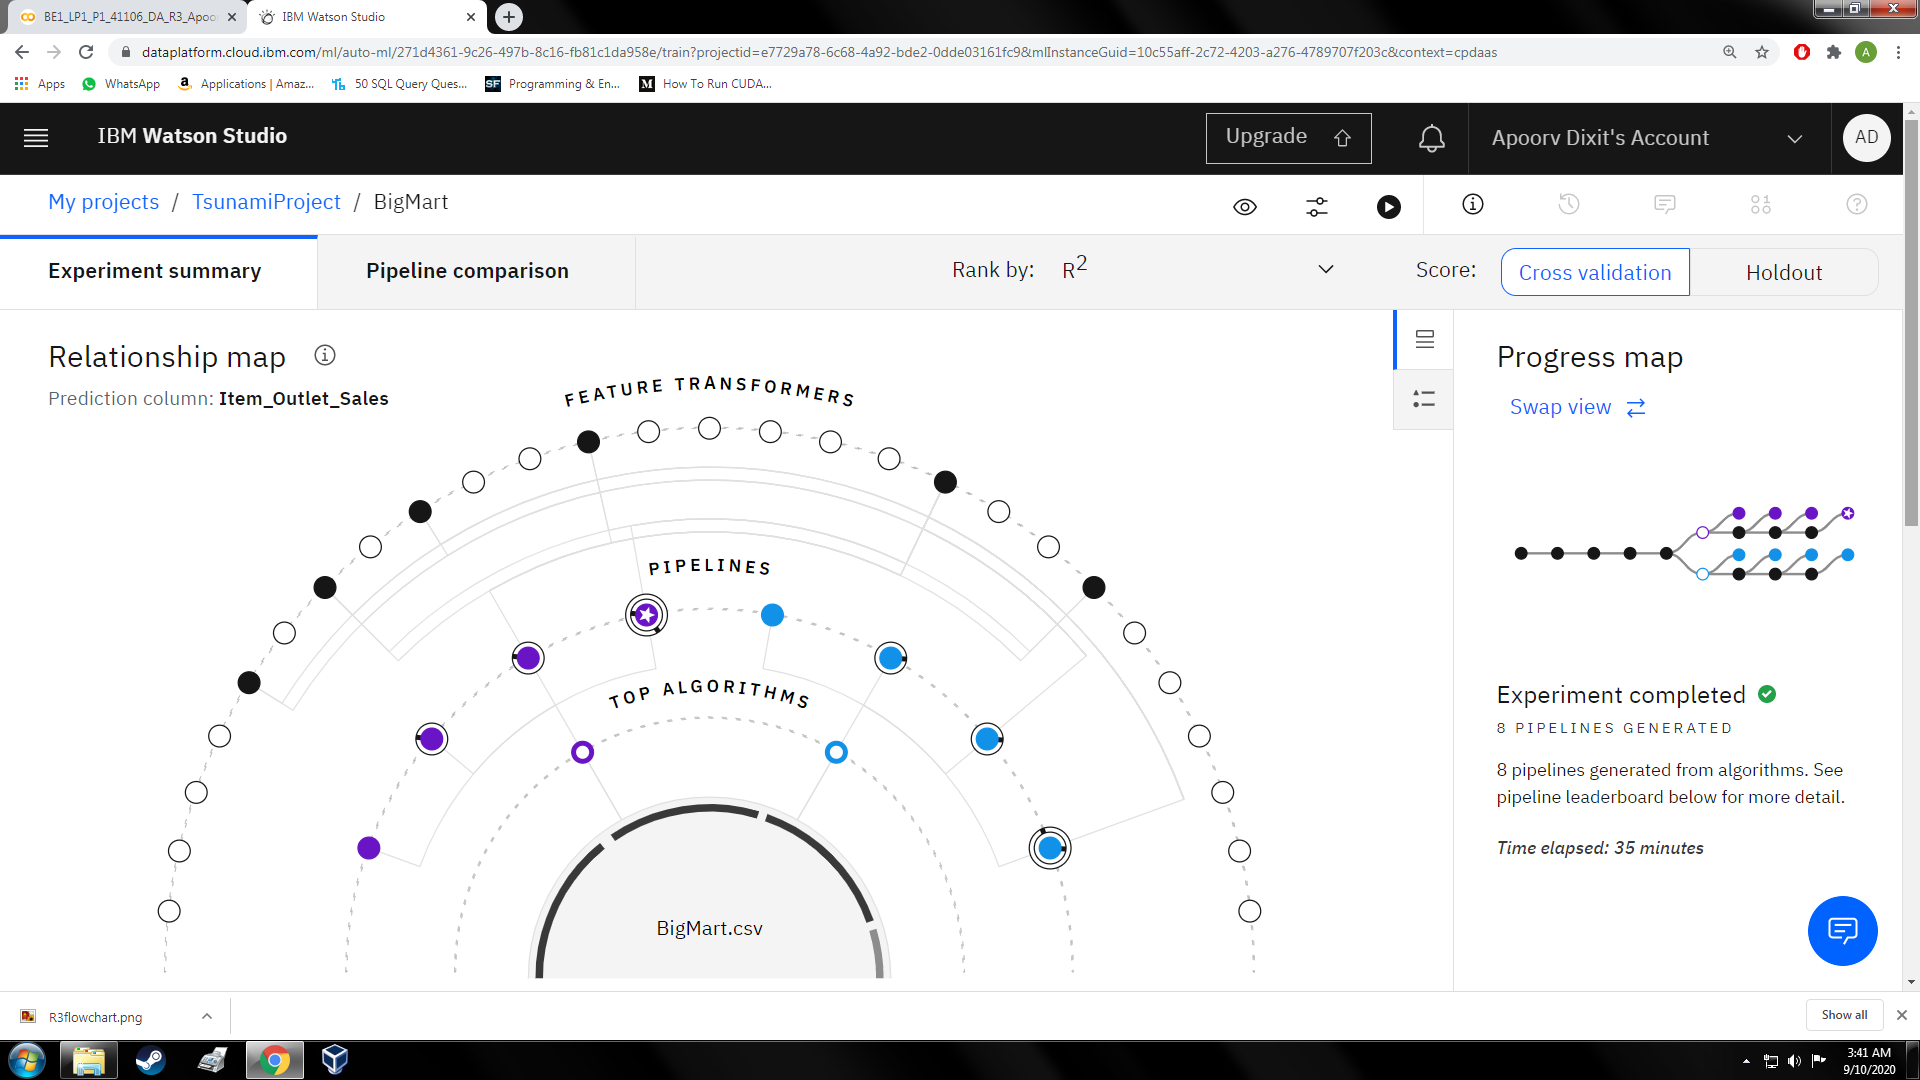

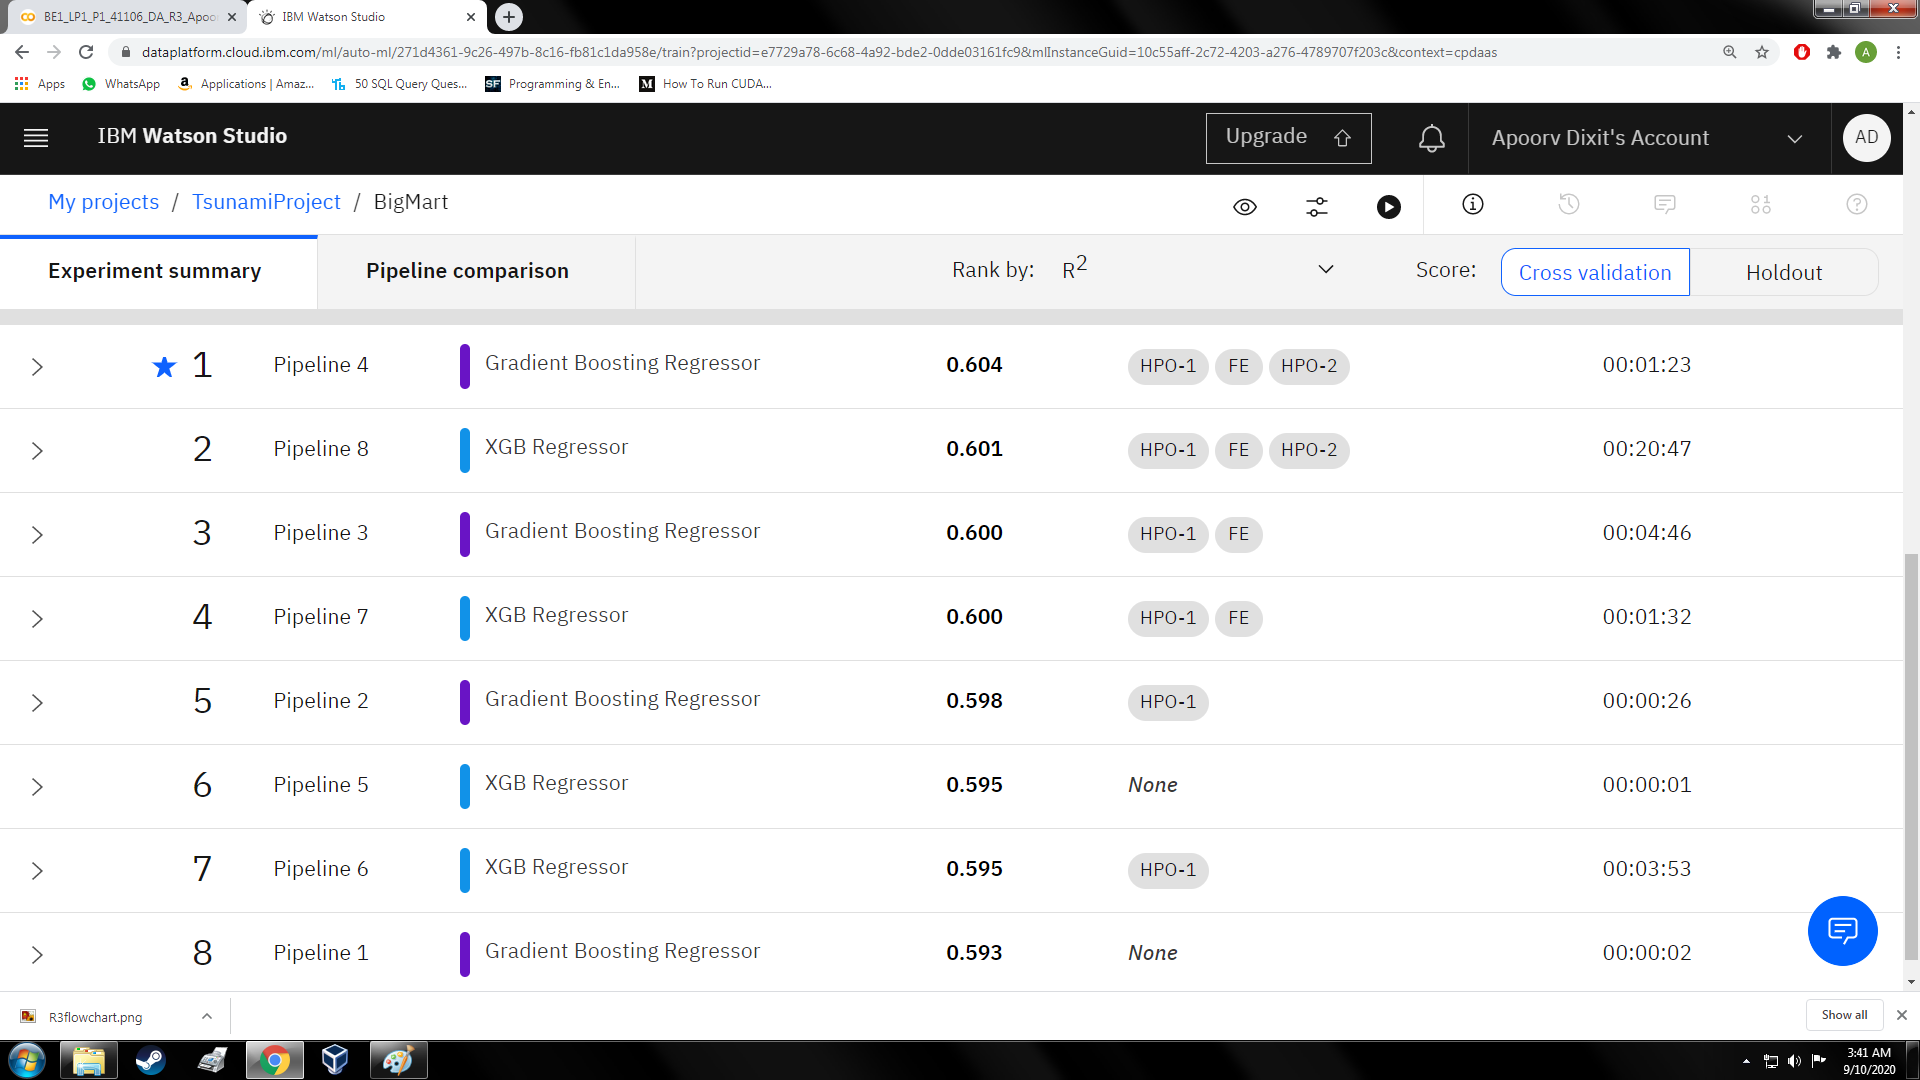